# Ragas Relevance and Groundedness Evaluation

This notebook demonstrates how to run Ragas relevance and groundedness evaluation using test data. Follow the steps below to import libraries, load data, prepare the evaluation dataset, run evaluations, and export results.

## 1. Import Required Libraries

Import all necessary libraries for data loading, evaluation, and metrics.

In [8]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from test_data.utils import fetch_data
import json
from langchain_openai import ChatOpenAI
from ragas.embeddings import OpenAIEmbeddings
import openai
from ragas import EvaluationDataset
from ragas.llms import LangchainLLMWrapper
from ragas import evaluate
from ragas.metrics import ResponseRelevancy, ContextRecall
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


## 2. Load Test Data

Load test data from JSONL files using the `fetch_data` utility and parse each line.

In [4]:
llm = ChatOpenAI(model="gpt-4.1-mini")
openai_client = openai.OpenAI()
embeddings = OpenAIEmbeddings(client=openai_client)
evaluator_llm = LangchainLLMWrapper(llm)

## 3. Prepare Evaluation Dataset

Convert the loaded test data into Ragas `EvaluationDataset` objects.

In [43]:
dataset_ids = [344342342]
evaluated_datasets = []
for dataset_id in dataset_ids:
    test_data = fetch_data(f'../test_data/test_questions/{dataset_id}.jsonl').splitlines()
    dataset = []
    for line in test_data:
        line = json.loads(line)
        dataset.append({
            "user_input": line["input"],
            "response": line["output"]
        })
    evaluation_dataset = EvaluationDataset.from_list(dataset)
    evaluated_datasets.append((dataset_id,evaluation_dataset))

## 4. Run Ragas Relevance Evaluation

Evaluate the relevance of responses using the `ResponseRelevancy` metric and display the results.

In [44]:
for dataset_id, evaluation_dataset in evaluated_datasets:
    result = evaluate(dataset=evaluation_dataset,metrics=[ResponseRelevancy()],llm=evaluator_llm)
    df = result.to_pandas()
    df.to_csv(f"eval_results_{dataset_id}.csv", index=False)

Evaluating: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


# 5. Plot the results

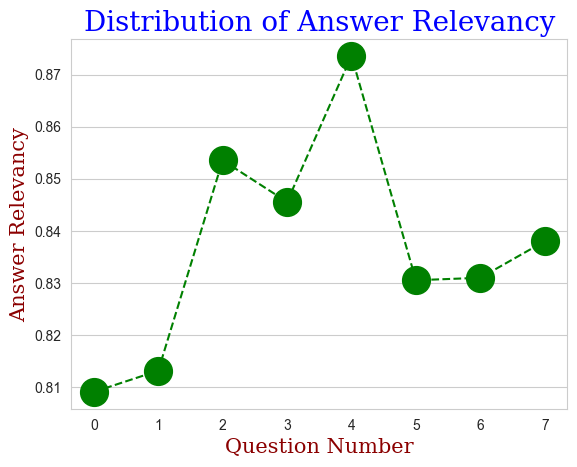

In [47]:
dataframes = []
for dataset_id, evaluation_dataset in evaluated_datasets:
    dataframes.append(pd.read_csv(f"eval_results_{dataset_id}.csv"))

# add code to plot each results dataframe
df = dataframes[0]
xpoints = [i + 1 for i in df.index.tolist()]
ypoints = df["answer_relevancy"].tolist()
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Question Number", fontdict=font2)
plt.ylabel("Answer Relevancy", fontdict=font2)
plt.title("Distribution of Answer Relevancy", fontdict=font1)
plt.plot(ypoints, 'o--g', ms=20)
plt.grid(axis='x')
plt.show()

*Task 1: After test set is generated, take a question as an input for SHA-256 hashing function (or another ID gen tool), assign a generated ID to each Q&A pair.*

*Task 2: evaluate 6 datasets with different test data QA pairs.*

x = np.array([0, 1, 2, 3])  
y = np.array([3, 8, 1, 10])

plt.subplot(2, 3, 1)  
plt.plot(x,y) 

x = np.array([0, 1, 2, 3])  
y = np.array([10, 20, 30, 40])

plt.subplot(2, 3, 2)  
plt.plot(x,y)

x = np.array([0, 1, 2, 3])  
y = np.array([3, 8, 1, 10])

plt.subplot(2, 3, 3)  
plt.plot(x,y)

x = np.array([0, 1, 2, 3])  
y = np.array([10, 20, 30, 40])

plt.subplot(2, 3, 4)  
plt.plot(x,y)

x = np.array([0, 1, 2, 3])  
y = np.array([3, 8, 1, 10])

plt.subplot(2, 3, 5)  
plt.plot(x,y)

x = np.array([0, 1, 2, 3])  
y = np.array([10, 20, 30, 40])

plt.subplot(2, 3, 6)  
plt.plot(x,y)

plt.show()